In [1]:
## Load utilities
# Numpy: for scientific computing and arrays
import numpy as np
# Matplotlib: for plotting
import matplotlib.pyplot as plt
# Seaborn: high level plots
import seaborn as sns
# Pandas: data analysis package
import pandas as pd

In [2]:
from sklearn.linear_model import SGDRegressor

In [3]:
# Load data
filename = "ANN_7ksliced.pk"
data = np.load(filename)

In [4]:
dname  = np.array(data[0]['dvarNames']) 
oname  = np.array(data[0]['objNames'])
names  = data[0]['dvarNames'] + data[0]['objNames'] # all names
dval   = np.asarray(data[1]['dvarValues'],dtype=np.float64) # convert string to float
oval   = np.asarray(data[1]['objValues'],dtype=np.float64)  
values = np.concatenate((dval,oval),axis=1) # concatenate

In [5]:
df = pd.DataFrame(data    = values,
                  columns = names);

In [6]:
goodMachines = [(df['emit_x'] < 4e-6)] and [(df['emit_y'] < 4e-6)]

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
classifier = np.array(goodMachines).ravel() # ravel to make 1d array

In [9]:
np.shape(classifier)

(7000,)

In [10]:
log_reg = LogisticRegression() # more info with ?LogisticRegression
log_reg.fit(dval,classifier) 

/home/vagrant/.pyenv/versions/py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
predictions = log_reg.predict(dval)

In [12]:
predictions

array([False, False,  True, ..., False, False, False])

In [13]:
# Accuracy (how many are correctly predicted?)
log_reg.score(dval, classifier)

0.9622857142857143

In [14]:
confidence_scores = log_reg.decision_function(dval)

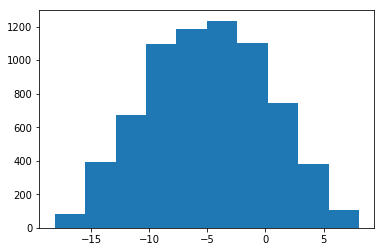

In [15]:
plt.hist(confidence_scores);

In [16]:
# More metrics
from sklearn.metrics import recall_score     # true positives / (true pos. + false neg.)
from sklearn.metrics import precision_score  # true positives / (true pos. + false pos.)

In [17]:
recall_score(classifier, predictions)

0.8796229151559101

In [18]:
precision_score(classifier, predictions)

0.9252479023646072

In [19]:
# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(classifier, confidence_scores, pos_label=True)
roc_auc = auc(fpr, tpr) # area under curve

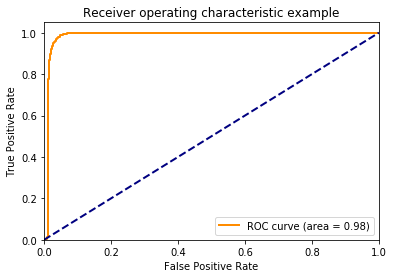

In [20]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right");